In [110]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.utils import shuffle


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info() # Check No Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.shape # Too Small Dataset

(150, 6)

In [17]:
# Drop the 'id' column
df = df.drop(columns='Id')

In [18]:
missing = df.isnull().sum().sort_values(ascending = False)
missing

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.duplicated().sum()


3

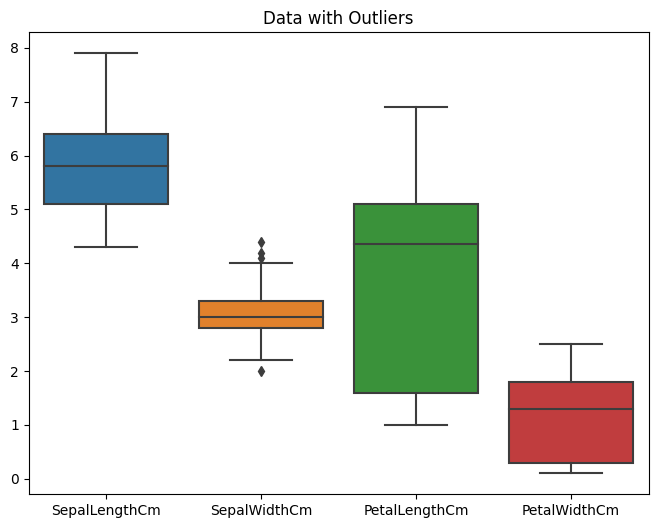

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show() # No Outliers in the data

## Build Model


In [116]:
label_encoder = LabelEncoder()

# Transform the 'y' column
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [117]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [138]:
X, y = shuffle(X, y, random_state=101)  # Randomly shuffles the data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

lg = LogisticRegression()

#Fit the model
clf = lg.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))


Accuracy Score :  1.0


In [139]:
class_counts = y_test.value_counts()
class_counts

Species
0    18
1    16
2    11
Name: count, dtype: int64

In [140]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[18  0  0]
 [ 0 16  0]
 [ 0  0 11]]


In [141]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [142]:
import pickle

with open('iris_model.pkl', 'wb') as file:
    pickle.dump(clf, file)